<a href="https://colab.research.google.com/github/oskarsah/107-2Multimedia/blob/master/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()

model.add(Conv2D(filters = 16,
                 kernel_size = (5,5),
                 padding = 'same',
                 input_shape = (28,28,1),
                 activation = 'relu'))

W0614 23:49:42.326335 140312211949440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 23:49:42.369445 140312211949440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 23:49:42.376696 140312211949440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [4]:
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 36,
                 kernel_size = (5,5),
                 padding = 'same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

W0614 23:49:53.133008 140312211949440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0614 23:49:53.160323 140312211949440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0614 23:49:53.171522 140312211949440 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 56s - loss: 0.1364 - acc: 0.9591 - val_loss: 0.0598 - val_acc: 0.9823
Epoch 2/20
 - 56s - loss: 0.0953 - acc: 0.9718 - val_loss: 0.0479 - val_acc: 0.9859
Epoch 3/20
 - 58s - loss: 0.0769 - acc: 0.9778 - val_loss: 0.0462 - val_acc: 0.9859
Epoch 4/20
 - 57s - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0384 - val_acc: 0.9881
Epoch 5/20
 - 56s - loss: 0.0561 - acc: 0.9829 - val_loss: 0.0357 - val_acc: 0.9895
Epoch 6/20
 - 55s - loss: 0.0515 - acc: 0.9845 - val_loss: 0.0369 - val_acc: 0.9891
Epoch 7/20
 - 58s - loss: 0.0465 - acc: 0.9859 - val_loss: 0.0342 - val_acc: 0.9905
Epoch 8/20
 - 98s - loss: 0.0421 - acc: 0.9867 - val_loss: 0.0323 - val_acc: 0.9907
Epoch 9/20
 - 71s - loss: 0.0389 - acc: 0.9879 - val_loss: 0.0300 - val_acc: 0.9913
Epoch 10/20
 - 56s - loss: 0.0376 - acc: 0.9883 - val_loss: 0.0291 - val_acc: 0.9918
Epoch 11/20
 - 99s - loss: 0.0318 - acc: 0.9899 - val_loss: 0.0318 - val_acc: 0.9917
Epoch 12/20
 - 77s - los

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

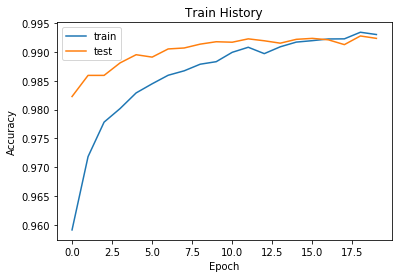

In [9]:
show_train_history('acc','val_acc')

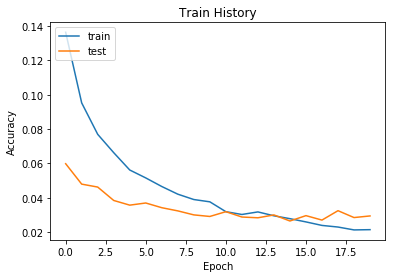

In [10]:
show_train_history('loss','val_loss')

In [11]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 4s 383us/step


0.9928

In [12]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

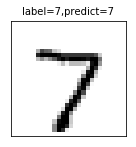

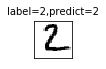

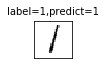

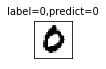

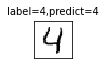

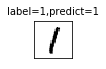

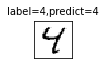

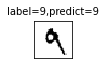

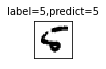

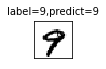

In [13]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num >25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        ax.set_title("label=" + str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)
        
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        plt.show()
        
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [14]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,1,1,2,0
1,0,1131,2,0,0,0,1,1,0,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,1,1004,0,3,0,0,2,0
4,0,0,0,0,980,0,1,0,0,1
5,0,1,0,3,0,886,1,0,0,1
6,2,2,1,0,1,2,948,0,2,0
7,0,1,9,1,0,0,0,1015,1,1
8,1,0,3,2,1,2,0,0,962,3


In [15]:
df = pd.DataFrame({'label':y_Test,'predict':prediction})

df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2369,5,3
2597,5,3
